Exporting **ChatGPT** Data

Visit your ChatGPT account [settings](https://chatgpt.com/#settings).
Navigate to **Data Controls**.
Click Export Data and follow the instructions.
You will receive a .zip file in your email. Download and extract it.
Locate the conversations.json file from the extracted data. Copy the **file path**.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/raselmandol/chatgpt-heatmap/blob/main/chatgpt_heatmap.ipynb)


**Checking the JSON.**

In [21]:
# Validate your large conversations.json
def read_json_in_chunks(file_path, chunk_size=1024 * 1024):  # 1 MB chunks
    with open(file_path, "r") as file:
        while True:
            chunk = file.read(chunk_size)
            if not chunk: # break
                break
            yield chunk

def validate_large_json(file_path):
    try:
        with open(file_path, "r") as file:
            json.load(file)  # Attempt to load the entire file
        print("JSON is valid. Go to the next step.")
        return True
    except json.JSONDecodeError as e:
        print(f"error in JSON: {e}")
        print("Now reading in chunks to identify issues...") # Helpful, you can use other alternatives

        for chunk in read_json_in_chunks(file_path):
            try:
                json.loads(chunk)
            except json.JSONDecodeError as chunk_error:
                print(f"Error in chunk: {chunk_error}")
                break
        return False


json_file_path = "/content/conversations.json"  # Replace with your conversations.json file path
validate_large_json(json_file_path)


JSON is valid. Go to the next step.


True

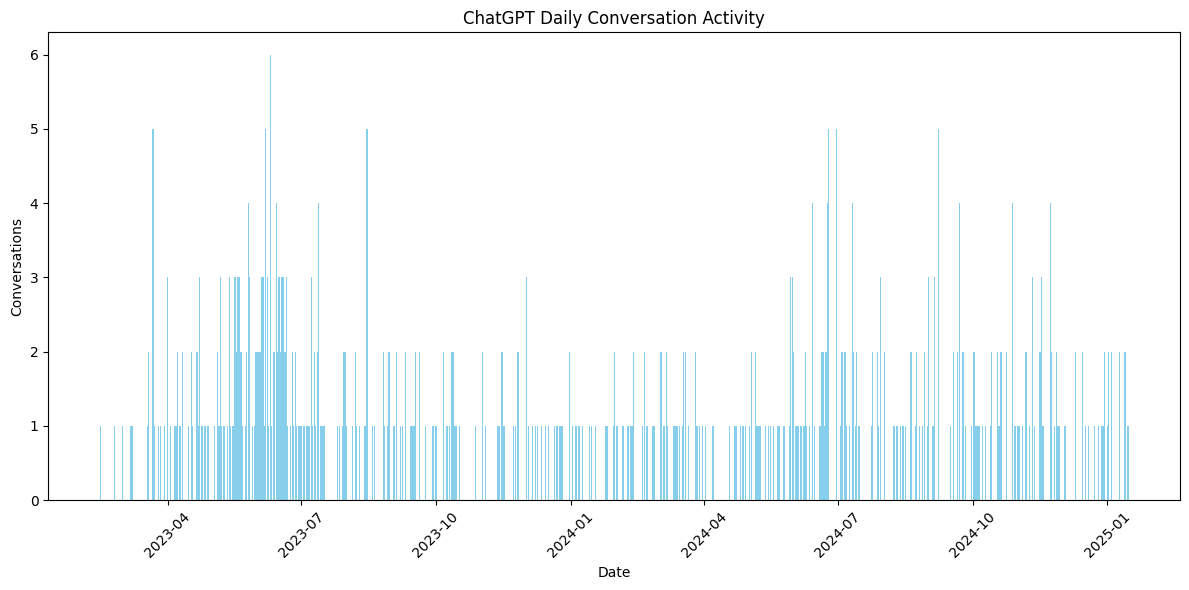

In [22]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

def load_conversation_data(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

def count_daily_activity(data):
    activity_counts = defaultdict(int)

    # Traverse through the JSON data
    for conversation in data:
        create_time = conversation.get("create_time", None)
        if create_time:
            # Convert create_time (UNIX timestamp) to a readable date
            date = datetime.utcfromtimestamp(create_time).date()
            activity_counts[date] += 1

    return activity_counts

def plot_activity_graph(activity_counts):
    dates = sorted(activity_counts.keys())
    counts = [activity_counts[date] for date in dates]

    plt.figure(figsize=(12, 6))
    plt.bar(dates, counts, color="skyblue")
    plt.xlabel("Date")
    plt.ylabel("Conversations")
    plt.title("ChatGPT Daily Conversation Activity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    json_file_path = "/content/conversations.json"  # Replace with your file path
    data = load_conversation_data(json_file_path)
    activity_counts = count_daily_activity(data)
    plot_activity_graph(activity_counts)


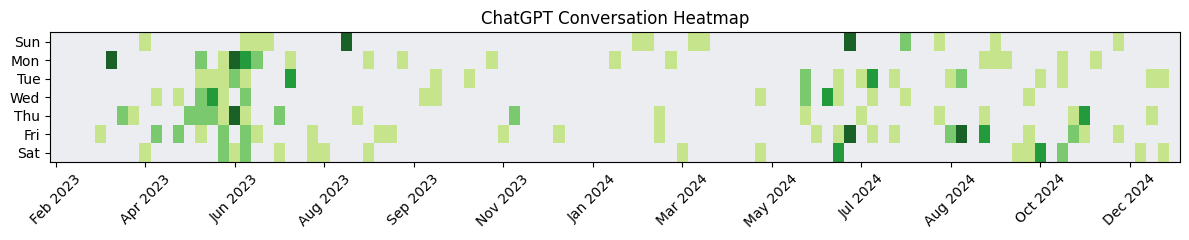

In [13]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from collections import defaultdict

def load_conversation_data(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

def count_daily_activity(data):
    activity_counts = defaultdict(int)
    # Traverse through the JSON data
    for conversation in data:
        create_time = conversation.get("create_time", None)
        if create_time:
            # Convert create_time (UNIX timestamp) to a readable date
            date = datetime.utcfromtimestamp(create_time).date()
            activity_counts[date] += 1
    return activity_counts

def generate_github_style_heatmap(activity_counts):
    # Prepare data for the heatmap
    start_date = min(activity_counts.keys())
    end_date = max(activity_counts.keys())
    num_weeks = ((end_date - start_date).days // 7) + 1

    # Create a grid for 7 days x num_weeks
    heatmap = np.zeros((7, num_weeks))

    for date, count in activity_counts.items():
        week_index = (date - start_date).days // 7
        day_index = (date - start_date).days % 7
        heatmap[day_index, week_index] = count

    # Create the heatmap
    cmap = ListedColormap(["#ebedf0", "#c6e48b", "#7bc96f", "#239a3b", "#196127"])
    plt.figure(figsize=(12, 2.5))
    plt.imshow(heatmap, aspect="auto", cmap=cmap, interpolation="nearest")

    # Configure axis
    plt.xticks(
        ticks=np.arange(0, num_weeks, step=max(num_weeks // 12, 1)),
        labels=[(start_date + timedelta(weeks=i)).strftime("%b %Y") for i in range(0, num_weeks, max(num_weeks // 12, 1))],
        rotation=45
    )
    plt.yticks(ticks=np.arange(7), labels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
    plt.title("ChatGPT Conversation Heatmap")
    #plt.colorbar(label="Activity Count", orientation="horizontal")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    json_file_path = "/content/conversations.json"  # Replace with your file path
    data = load_conversation_data(json_file_path)
    activity_counts = count_daily_activity(data)
    generate_github_style_heatmap(activity_counts)


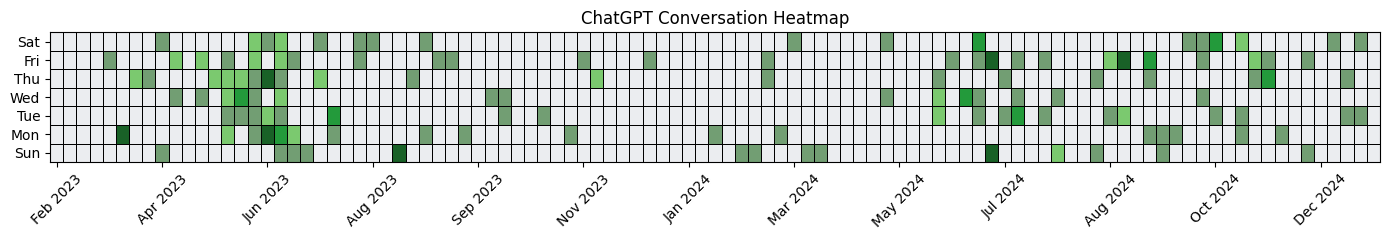

In [19]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from collections import defaultdict

def load_conversation_data(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

def count_daily_activity(data):
    activity_counts = defaultdict(int)
    # Traverse through the JSON data
    for conversation in data:
        create_time = conversation.get("create_time", None)
        if create_time:
            # Convert create_time (UNIX timestamp) to a readable date
            date = datetime.utcfromtimestamp(create_time).date()
            activity_counts[date] += 1
    return activity_counts

def generate_github_style_heatmap(activity_counts):
    # Prepare data for the heatmap
    start_date = min(activity_counts.keys())
    end_date = max(activity_counts.keys())
    num_weeks = ((end_date - start_date).days // 7) + 1

    # Create a grid for 7 days x num_weeks
    heatmap = np.zeros((7, num_weeks))

    for date, count in activity_counts.items():
        week_index = (date - start_date).days // 7
        day_index = (date - start_date).days % 7
        heatmap[day_index, week_index] = count

    # Create the heatmap
    cmap = ListedColormap(["#ebedf0", "#729e73", "#7bc96f", "#239a3b", "#196127"])
    plt.figure(figsize=(14, 2.5))

    # Plot the heatmap with cell borders
    plt.pcolormesh(
        heatmap,
        cmap=cmap,
        edgecolors="black",  # Add black borders between cells
        linewidths=0.5       # Set border thickness
    )

    # Configure axis
    plt.xticks(
        ticks=np.arange(0, num_weeks, step=max(num_weeks // 12, 1)) + 0.5,
        labels=[(start_date + timedelta(weeks=i)).strftime("%b %Y") for i in range(0, num_weeks, max(num_weeks // 12, 1))],
        rotation=45
    )
    plt.yticks(ticks=np.arange(7) + 0.5, labels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
    plt.title("ChatGPT Conversation Heatmap")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    json_file_path = "/content/conversations.json"  # Replace with your conversations.json file path
    data = load_conversation_data(json_file_path)
    activity_counts = count_daily_activity(data)
    generate_github_style_heatmap(activity_counts)
